In [15]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [5]:
data=pd.read_csv("/content/UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
data.shape

(30000, 25)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Data preprocessing

In [24]:
{'EDUCATION':"EDU"}.items()

dict_items([('EDUCATION', 'EDU')])

In [28]:
pd.get_dummies(x['EDUCATION'],prefix="EDU",dtype="int")

,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
29995,0,0,0,1,0,0,0
29996,0,0,0,1,0,0,0
29997,0,0,1,0,0,0,0
29998,0,0,0,1,0,0,0


In [30]:
def onehot_encode(df,column_dict):
  df=df.copy()
  for column, prefix in column_dict.items():
    dummies=pd.get_dummies(df[column],prefix=prefix)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
  return df

In [39]:
def preprocessing_inputs(df):
  df=df.copy()
  #drop id
  df=df.drop("ID",axis=1)
  df=onehot_encode(df,{'EDUCATION':'EDU','MARRIAGE':'MAR'})


  #split df into x and y
  y=df['default.payment.next.month'].copy()
  x=df.drop('default.payment.next.month',axis=1).copy()
  # Scale x with a standard scaler
  scaler=StandardScaler()
  x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

  return x,y

x,y=preprocessing_inputs(data)

In [13]:
x

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [40]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

Visualization

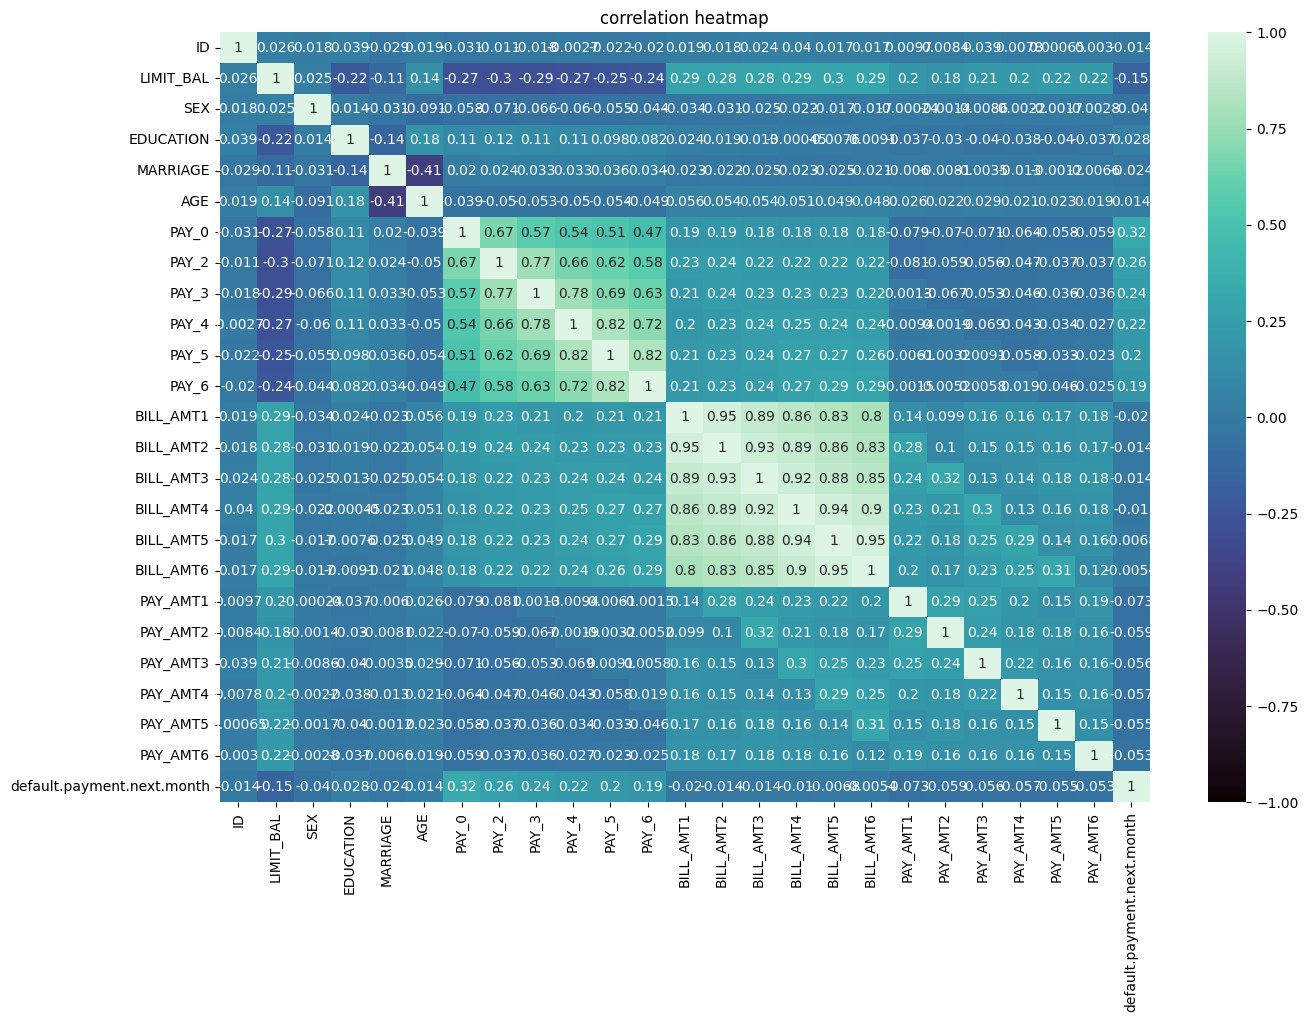

In [41]:
corr=data.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap="mako")
plt.title("correlation heatmap")
plt.show()

In [42]:
x.nunique()

LIMIT_BAL       81
SEX              2
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
EDU_0            2
EDU_1            2
EDU_2            2
EDU_3            2
EDU_4            2
EDU_5            2
EDU_6            2
MAR_0            2
MAR_1            2
MAR_2            2
MAR_3            2
dtype: int64

In [43]:
x.describe()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-6.063298e-17,2.330580e-16,-1.856885e-16,-1.894781e-17,4.926430e-17,-5.494864e-17,3.126388e-17,-3.031649e-17,4.547474e-17,-1.231607e-17,...,-4.736952e-18,-4.642213e-17,4.168517e-17,-6.631732e-18,-4.926430e-17,1.492140e-17,-5.092223e-18,9.473903e-18,-1.515825e-17,-7.105427e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.213794e+00,-1.234323e+00,-1.571479e+00,-1.764843e+00,-1.558876e+00,-1.532192e+00,-1.521944e+00,-1.530046e+00,-1.486041e+00,-2.944312e+00,...,-7.383746e-01,-9.372952e-01,-4.427518e-01,-6.416291e-02,-9.706320e-02,-4.126615e-02,-4.246464e-02,-9.142609e-01,-1.066471e+00,-1.043257e-01
25%,-9.054983e-01,-1.234323e+00,-8.120745e-01,-8.749911e-01,-7.235699e-01,-6.966635e-01,-6.665987e-01,-6.475648e-01,-6.164517e-01,-6.473120e-01,...,-7.383746e-01,-9.372952e-01,-4.427518e-01,-6.416291e-02,-9.706320e-02,-4.126615e-02,-4.246464e-02,-9.142609e-01,-1.066471e+00,-1.043257e-01
50%,-2.118326e-01,8.101607e-01,-1.611565e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,2.349165e-01,2.531374e-01,-3.916884e-01,...,-7.383746e-01,-9.372952e-01,-4.427518e-01,-6.416291e-02,-9.706320e-02,-4.126615e-02,-4.246464e-02,-9.142609e-01,9.376717e-01,-1.043257e-01
75%,5.589071e-01,8.101607e-01,5.982479e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,2.349165e-01,2.531374e-01,2.154919e-01,...,1.354326e+00,1.066900e+00,-4.427518e-01,-6.416291e-02,-9.706320e-02,-4.126615e-02,-4.246464e-02,1.093780e+00,9.376717e-01,-1.043257e-01
max,6.416528e+00,8.101607e-01,4.720729e+00,7.133674e+00,6.794184e+00,6.823091e+00,7.031505e+00,7.294767e+00,7.209850e+00,1.240296e+01,...,1.354326e+00,1.066900e+00,2.258602e+00,1.558533e+01,1.030257e+01,2.423294e+01,2.354900e+01,1.093780e+00,9.376717e-01,9.585367e+00


Training

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [46]:
len(x_train)

24000

In [47]:
len(x_test)

6000

In [50]:
model=LogisticRegression()

In [51]:
model.fit(x_train,y_train)

LogisticRegression()

In [71]:
pred_train=model.predict(x_train)
y_pred=model.predict(x_test)

In [74]:
# calculate accuracy
from sklearn.metrics import accuracy_score
acc_score_traing=accuracy_score(pred_train,y_train)

acc_score_testing=accuracy_score(y_pred,y_test)

print(acc_score_traing)
print(acc_score_testing)


0.81075
0.8151666666666667


In [ ]:
# here i got accuracy of 81% by this model